In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [168]:
import gym
import math
from scipy.io import loadmat
from multiworld.envs.pygame import register_custom_envs
import matplotlib.pyplot as plt
import numpy as np

register_custom_envs()

In [39]:
env = gym.make("PointmassUWallTrainEnvBig-v1")

In [233]:
def plot_traj(path):
    data = loadmat(path)
    actions_seqs = data['actions']
    preds_seqs_and_particles = data['predictions']
    n_rows = min(3, math.ceil(len(action_seqs/4.)))
    fig, axes = plt.subplots(n_rows, 4, figsize=(20,5*n_rows))
    pred_costs = data['pred_costs'][0] if 'pred_costs' in data else range(999)
    for (t, state_particles, actions, pred_cost) in zip(
            range(12),
            preds_seqs_and_particles,
            actions_seqs,
            pred_costs,
    ):
        r = t // 4
        c = t % 4
        if n_rows == 1:
            ax = axes[c]
        else:
            ax = axes[r][c]
        actions = actions.reshape(-1, 2)

        goal_particles = preds_seqs_and_particles[t][:, :, 2:]
        states = np.mean(state_particles, axis=1)
        goal = goal_particles[0, i, :]
        env.plot_trajectory(ax, states, actions, goal=goal)
        ax.set_title('predicted cost = {}'.format(pred_cost))

In [172]:
def plot_actual_traj(path):
    data = loadmat(path)
    action_seqs = data['eval actions']
    state_seqs = data['eval observations']
    action_seqs.shape, state_seqs.shape
    n_rows = min(3, math.ceil(len(action_seqs/4.)))
    fig, axes = plt.subplots(n_rows, 4, figsize=(20,5*n_rows))
    for (t, full_states, actions) in zip(range(12), state_seqs, action_seqs):
        r = t // 4
        c = t % 4
        if n_rows == 1:
            ax = axes[c]
        else:
            ax = axes[r][c]
        states = full_states[:, :2]
        goal = full_states[0, 2:]
        env.plot_trajectory(ax, states, actions, goal=goal)
        ax.set_title("actual traj")

In [ ]:
def plot_goals(path,t=0):
    data = loadmat(path)
    actions_seqs = data['actions']
    preds_seqs_and_particles = data['predictions']

    n_rows = min(3, math.ceil(len(action_seqs/4.)))
    fig, axes = plt.subplots(n_rows, 4, figsize=(20,5*n_rows))
    for (t, full_states, actions) in zip(
            range(12),
            preds_seqs_and_particles,
            actions_seqs
    ):
        r = t // 4
        c = t % 4
        if n_rows == 1:
            ax = axes[c]
        else:
            ax = axes[r][c]
        actions = actions.reshape(-1, 2)
        goal_particles = full_states[:, :, 2:]
        goals = np.mean(goal_particles, axis=1)
        env.plot_trajectory(ax, goals, actions)

def get_goals(path):
    data = loadmat(path)
    actions_seqs = data['actions']
    preds_seqs_and_particles = data['predictions']
    print("shape dims: (planning time, within-plan time, particle, goal dim)")
    return preds_seqs_and_particles[:, :, :, 2:]

def get_states(path):
    data = loadmat(path)
    actions_seqs = data['actions']
    preds_seqs_and_particles = data['predictions']
    print("shape dims: (planning time, within-plan time, particle, state dim)")
    return preds_seqs_and_particles[:, :, :, :2]

# July 16  

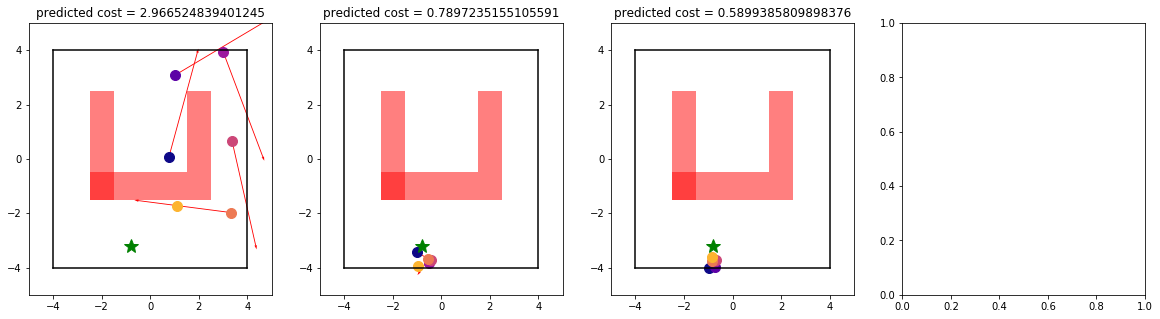

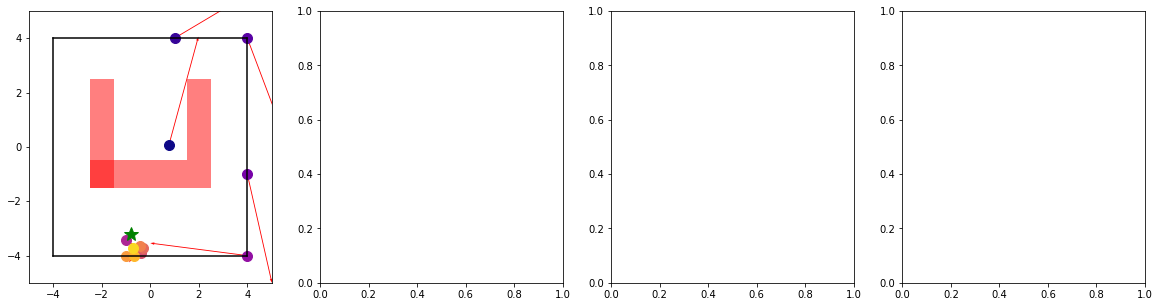

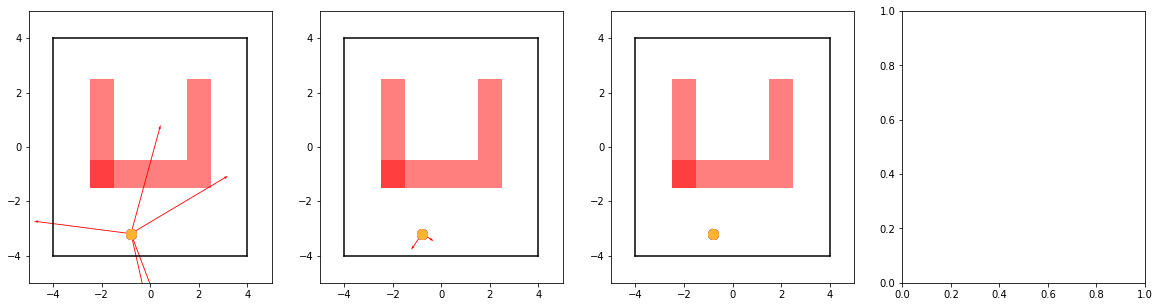

In [234]:
base_dir = "/home/vitchyr/git/handful-of-trials/log/point-uwall-sweep-after-terminal-cost-fix-2/2019-07-10--15:49:40/debug_log/2019-07-16--11:52:38"
plot_traj(base_dir + "/train_iter1/predictions.mat")
plot_actual_traj(base_dir + "/logs.mat")
plot_goals(base_dir + "/train_iter1/predictions.mat")

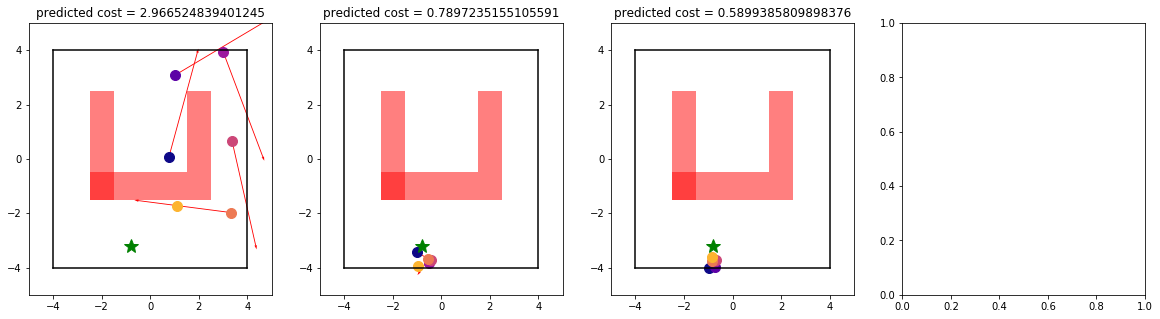

In [232]:
data = loadmat(base_dir + "/train_iter1/predictions.mat")
actions_seqs = data['actions']
preds_seqs_and_particles = data['predictions']
n_rows = min(3, math.ceil(len(action_seqs/4.)))
fig, axes = plt.subplots(n_rows, 4, figsize=(20,5*n_rows))
pred_costs = data['pred_costs'][0] if 'pred_costs' in data else range(999)
for (t, state_particles, actions, pred_cost) in zip(
        range(12),
        preds_seqs_and_particles,
        actions_seqs,
        pred_costs,
):
    r = t // 4
    c = t % 4
    if n_rows == 1:
        ax = axes[c]
    else:
        ax = axes[r][c]
    actions = actions.reshape(-1, 2)

    goal_particles = preds_seqs_and_particles[t][:, :, 2:]
    states = np.mean(state_particles, axis=1)
    goal = goal_particles[0, i, :]
    env.plot_trajectory(ax, states, actions, goal=goal)
    ax.set_title('predicted cost = {}'.format(pred_cost))

In [228]:
data['pred_costs']

array([[2.9665248, 0.7897235, 0.5899386]], dtype=float32)

In [219]:
actions.shape

(12, 2)

# Old stuff

Typical "train mode" rollouts

AssertionError: 

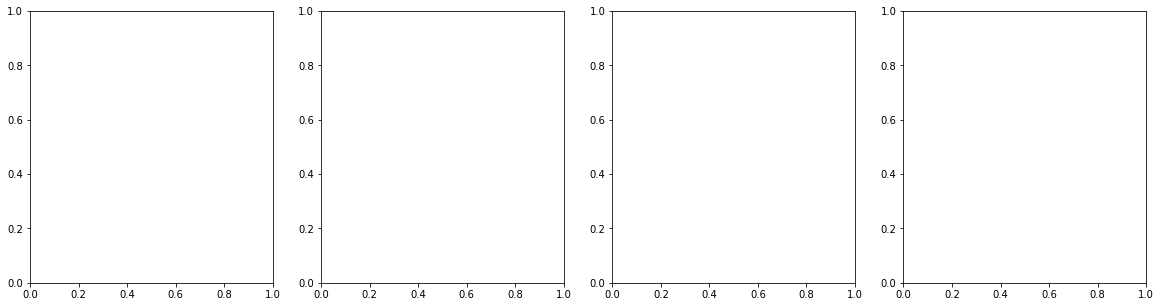

In [200]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--14:52:08/train_iter1/predictions.mat")

AssertionError: 

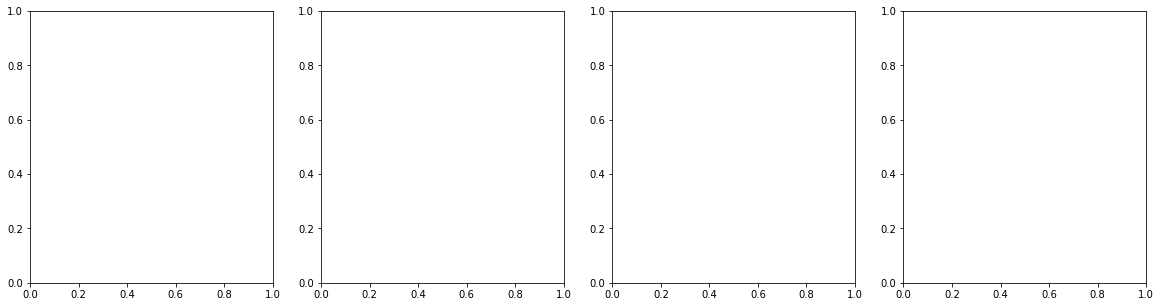

In [203]:
data = loadmat("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--14:52:08/train_iter1/predictions.mat")
actions_seqs = data['actions']
preds_seqs_and_particles = data['predictions']
n_rows = min(3, math.ceil(len(action_seqs/4.)))
fig, axes = plt.subplots(n_rows, 4, figsize=(20,5*n_rows))
for (t, state_particles, actions, pred_cost) in zip(
        range(12),
        preds_seqs_and_particles,
        action_seqs,
        data.get('pred_costs', range(999)),
):
    r = t // 4
    c = t % 4
    if n_rows == 1:
        ax = axes[c]
    else:
        ax = axes[r][c]
    actions = actions.reshape(-1, 2)

    goal_particles = preds_seqs_and_particles[t][:, :, 2:]
    states = np.mean(state_particles, axis=1)
    goal = goal_particles[0, i, :]
    env.plot_trajectory(ax, states, actions, goal=goal)
    ax.set_title('predicted cost = {}'.format(pred_cost))

In [205]:
actions_seqs.shape, preds_seqs_and_particles.shape

((12, 8), (12, 5, 20, 4))

AssertionError: 

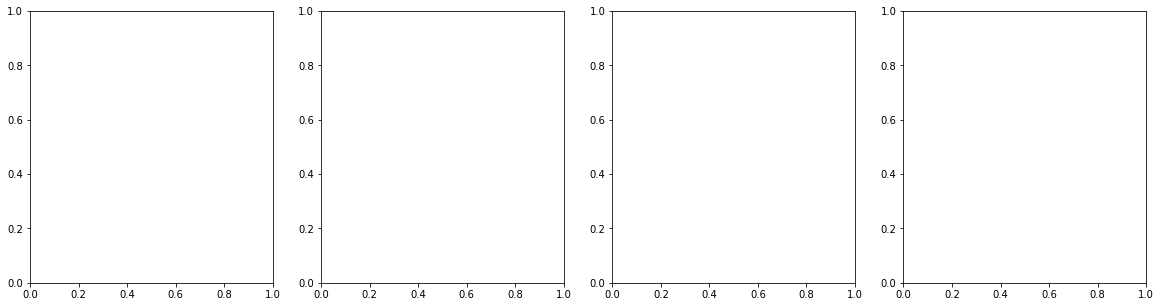

In [201]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--14:57:51/train_iter1/predictions.mat")

Typical "test mode" rollout

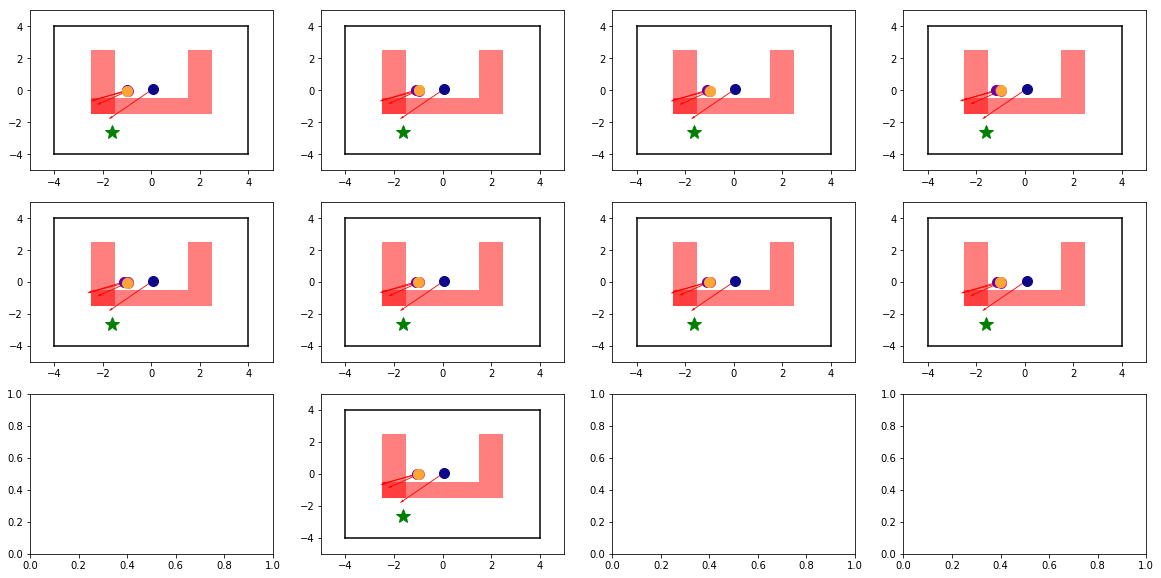

In [57]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:02:10/train_iter1/predictions.mat")

Trying to only penalize last time step

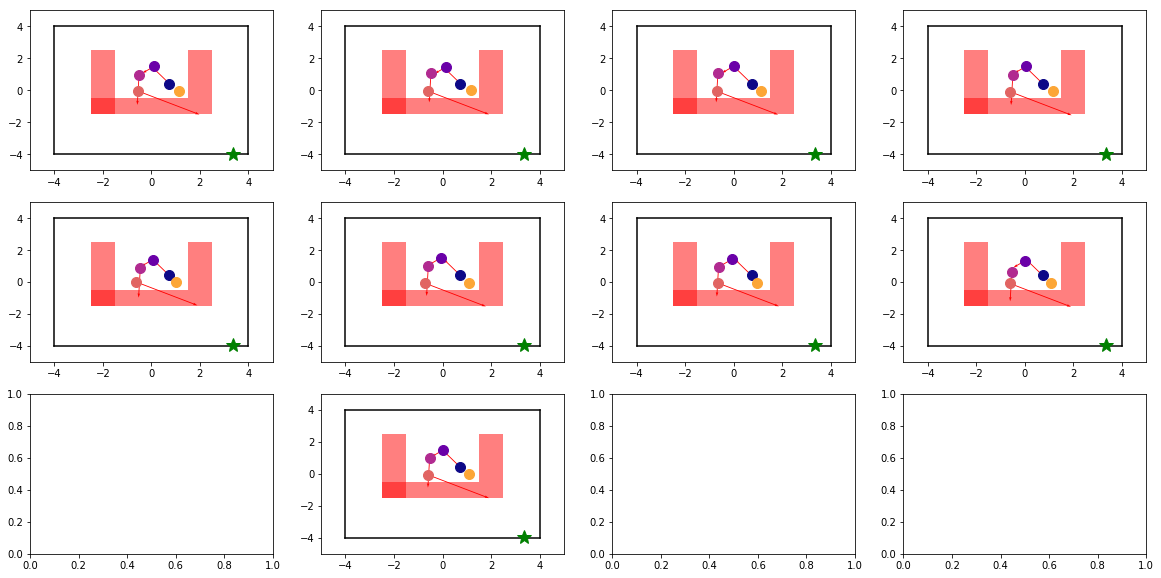

In [58]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:05:58/train_iter1/predictions.mat")

With horizon=8

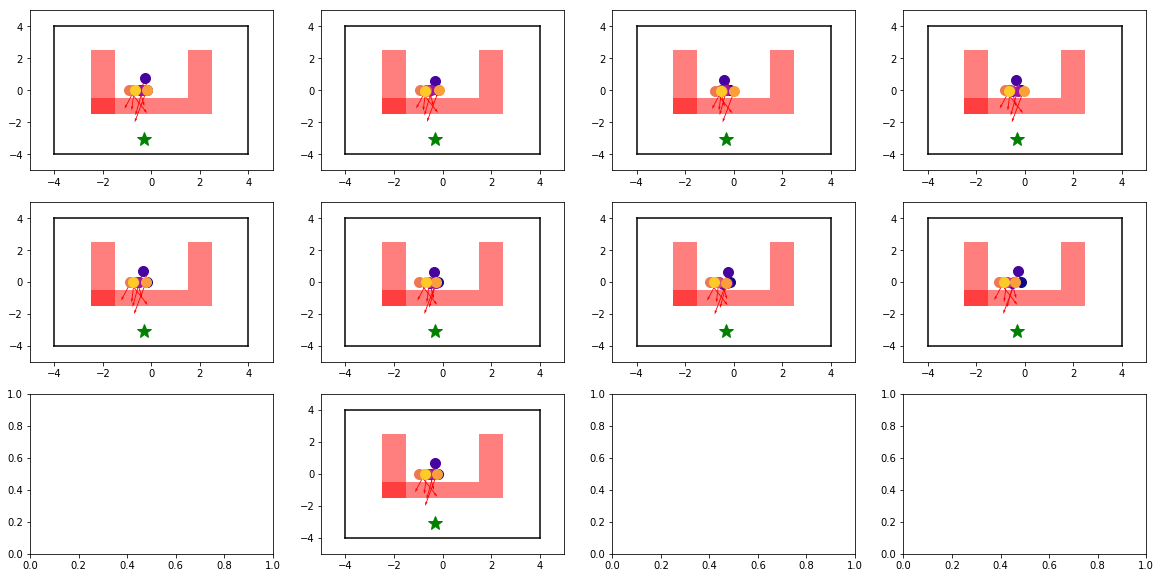

In [62]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:09:04/train_iter1/predictions.mat")

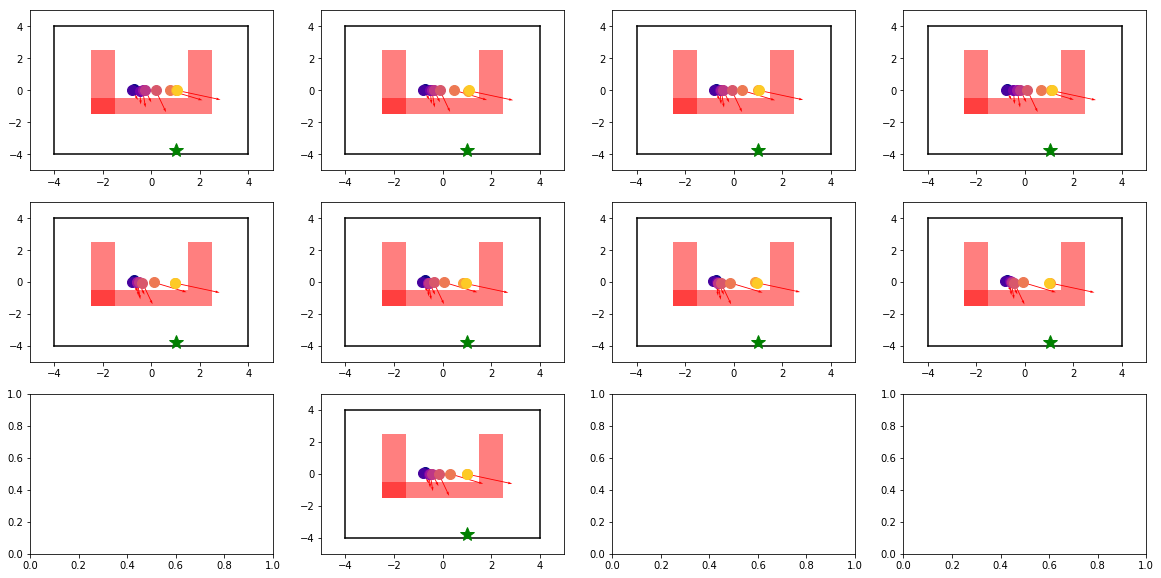

In [63]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:47:25/train_iter1/predictions.mat")

## HArd-coded initial warm start

With a hard-coded initial warm-start that goes around the wall with squared exp cost at last time step

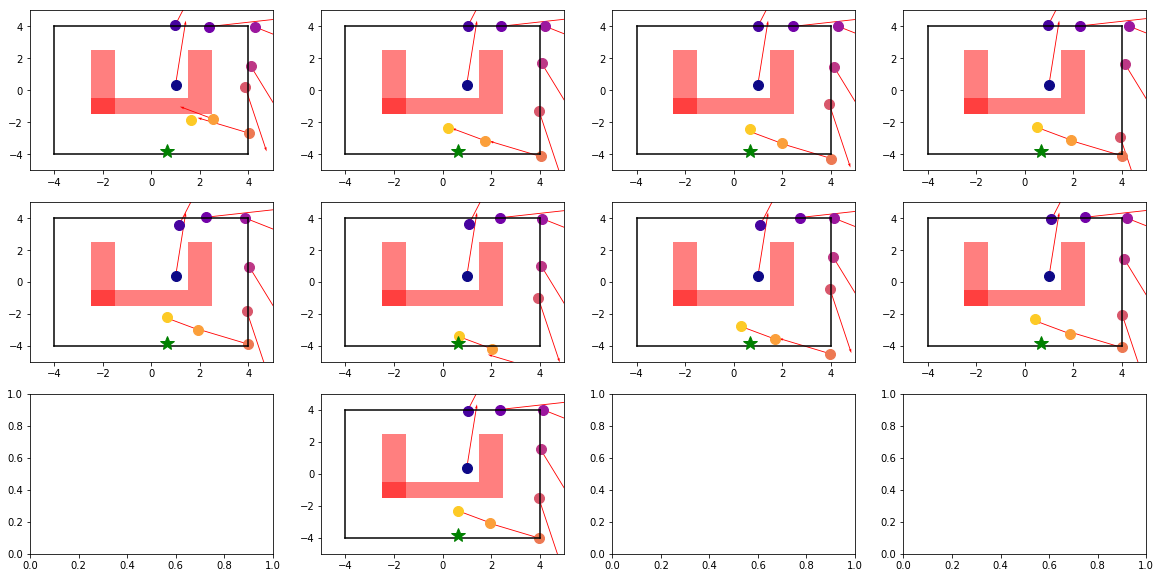

In [64]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:50:26/train_iter1/predictions.mat")

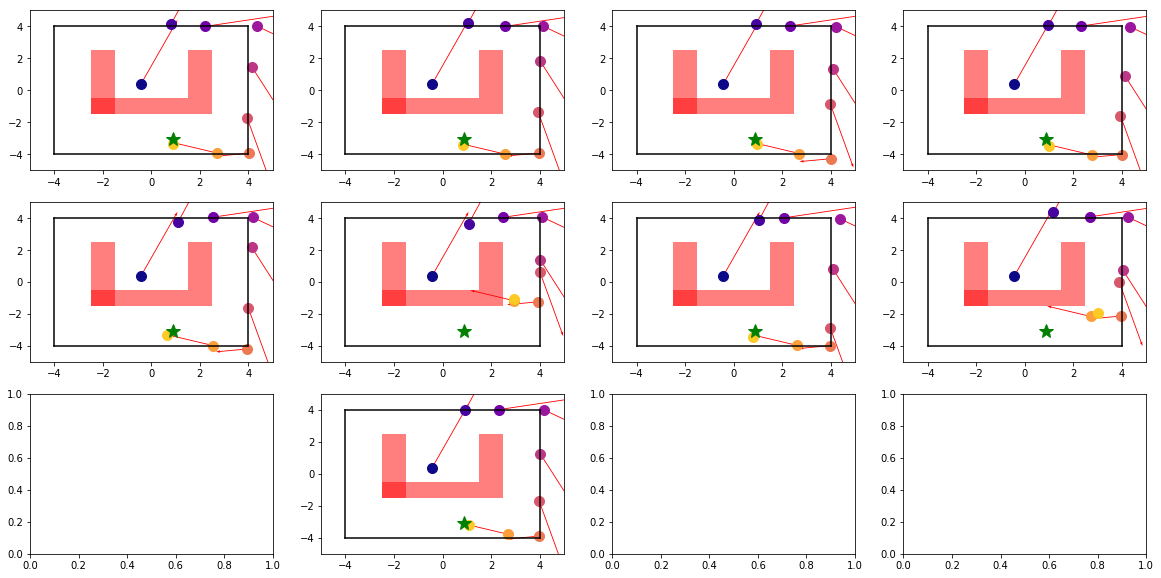

In [65]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:52:43/train_iter1/predictions.mat")

What if I 

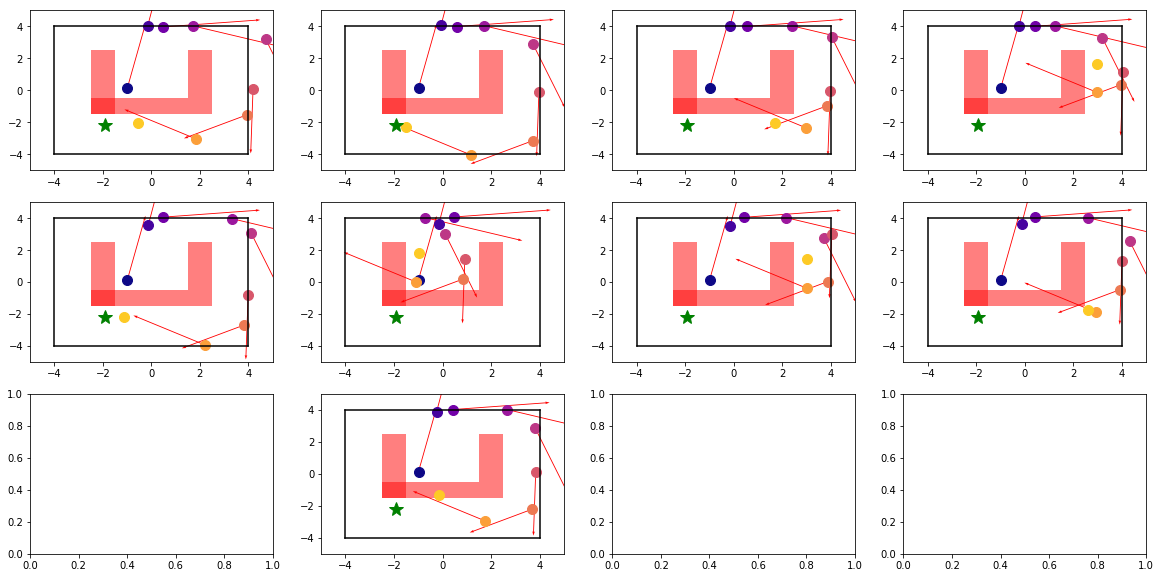

In [66]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:53:46/train_iter1/predictions.mat")

With squared loss at last time step

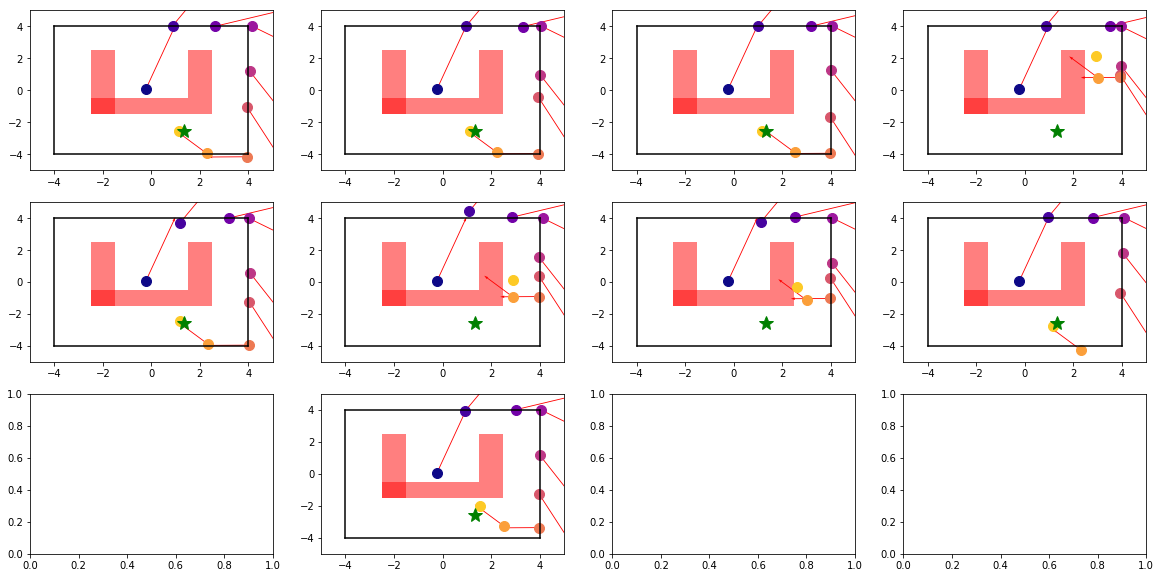

In [67]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:55:07/train_iter1/predictions.mat")

What if I only go to the middle right rather than all the way around?

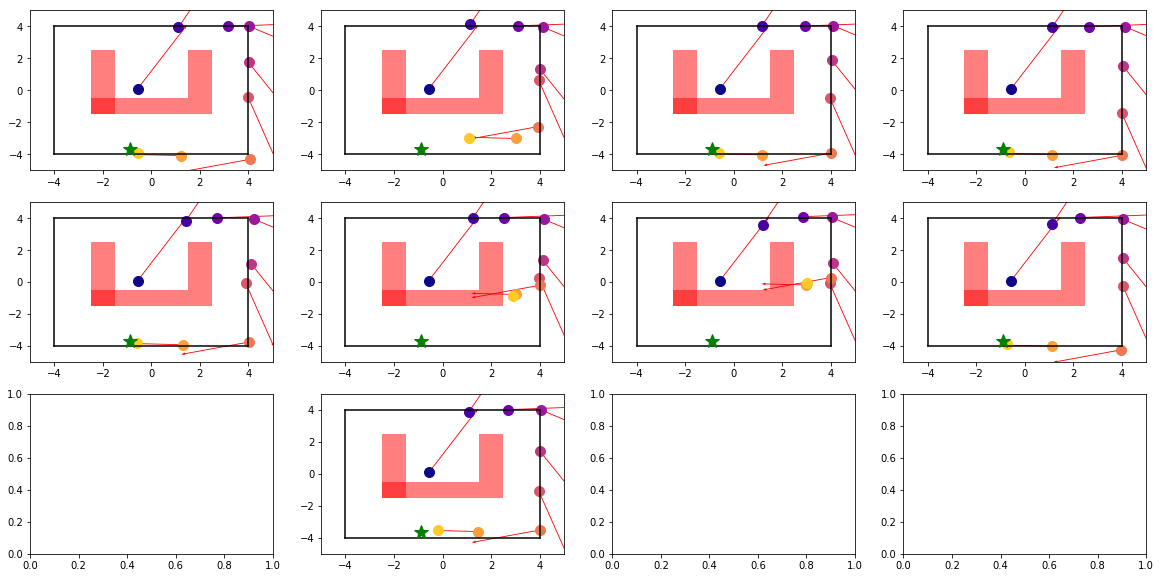

In [70]:
# final cost predicted: 0.258743
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--15:58:50/train_iter1/predictions.mat")

versus no warm start

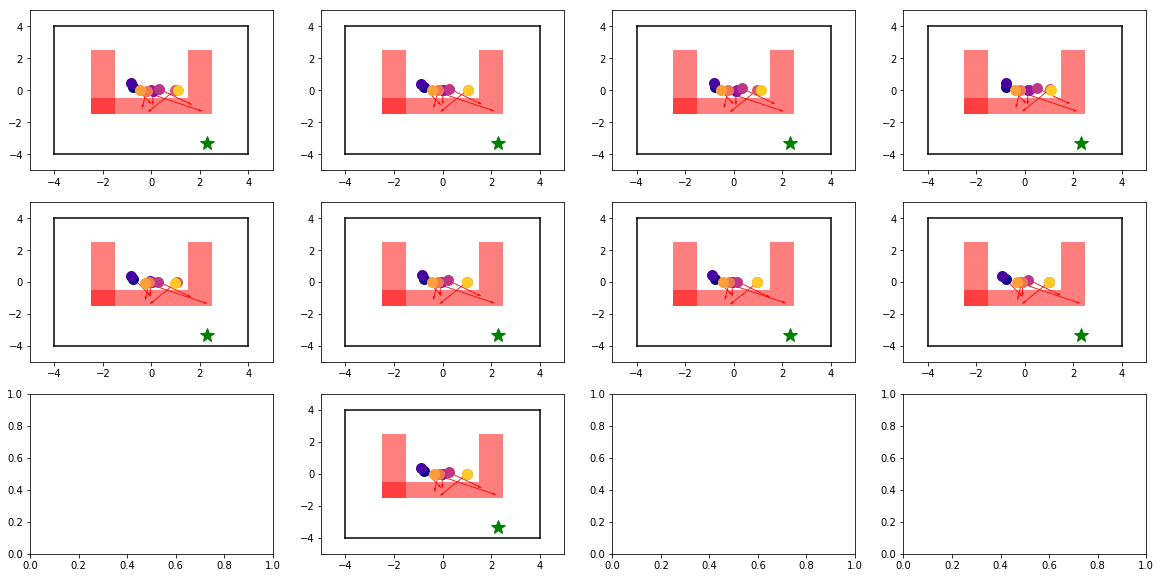

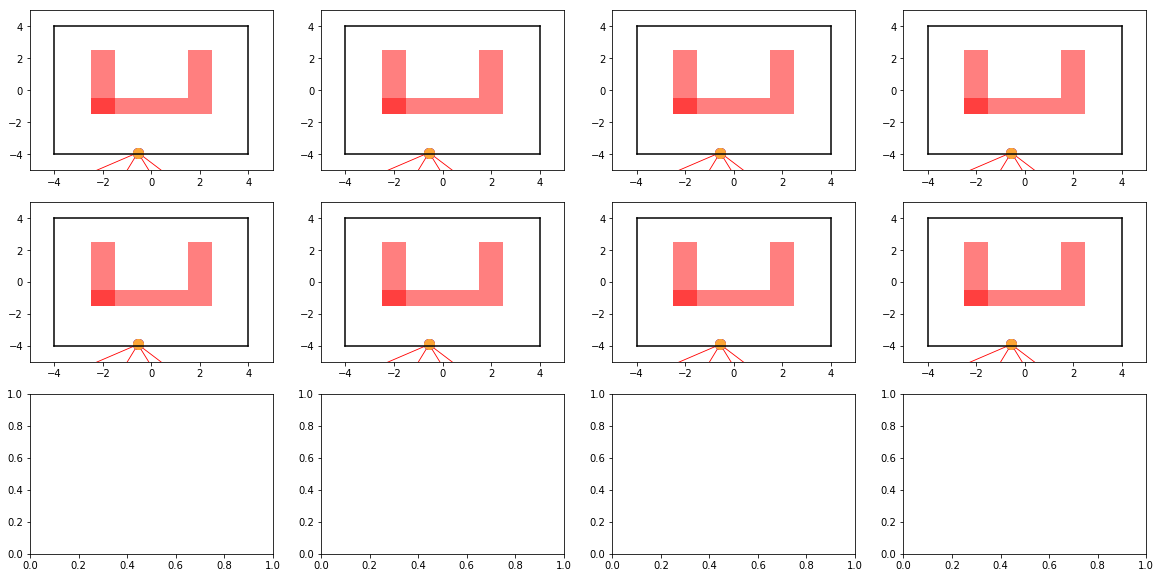

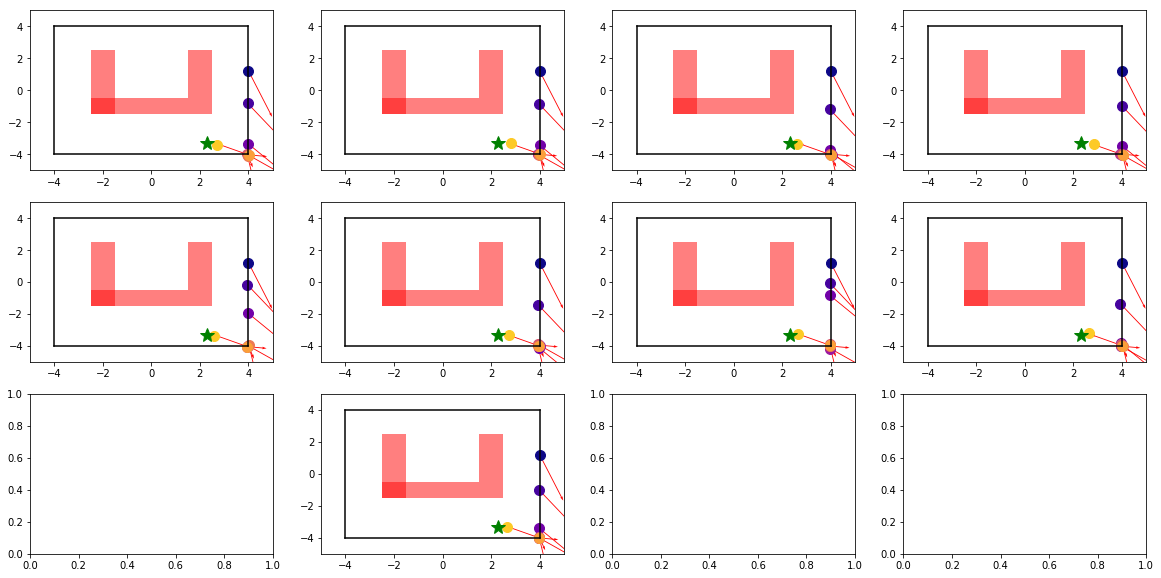

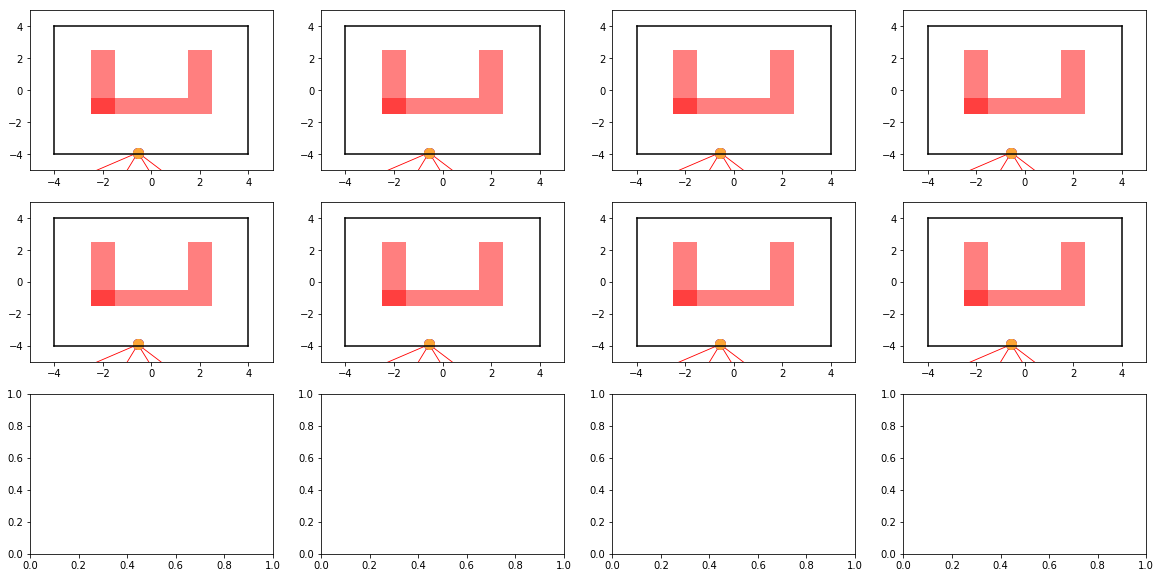

In [83]:
# final cost predicted 0.148263
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--16:00:04/train_iter1/predictions.mat")
plot_goals("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--16:00:04/train_iter1/predictions.mat")

plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--16:00:04/train_iter1/predictions.mat", t=-1)
plot_goals("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--16:00:04/train_iter1/predictions.mat", t=-1)

Can we only plan every 5 steps?

In [94]:
path = "/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--16:00:04/train_iter1/predictions.mat"
data = loadmat(path)
actions_seqs = data['actions']
preds_seqs_and_particles = data['predictions']
t = 0
state_particles = preds_seqs_and_particles[t][:, :, :2]
goal_particles = preds_seqs_and_particles[t][:, :, 2:]

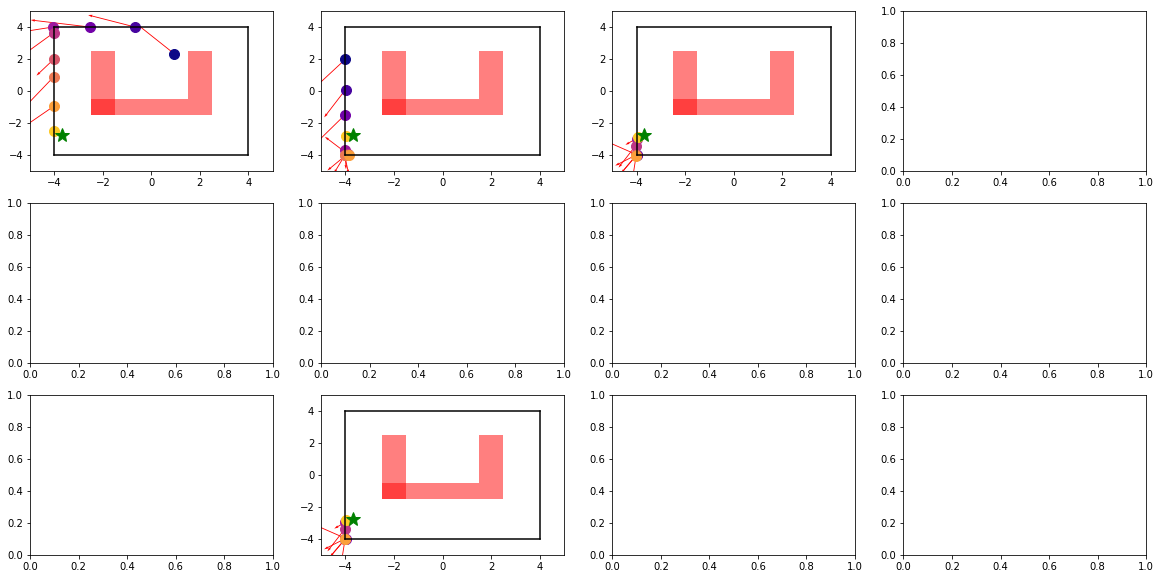

In [95]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-10--12:48:02/train_iter1/predictions.mat")

What. This run predicted a final cost of 0. Why??

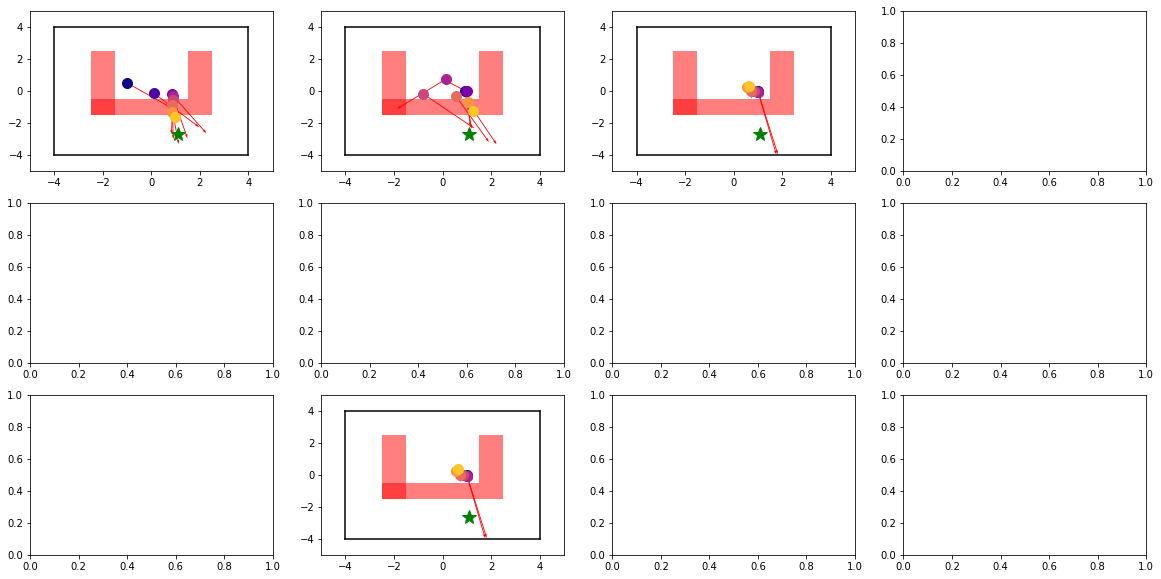

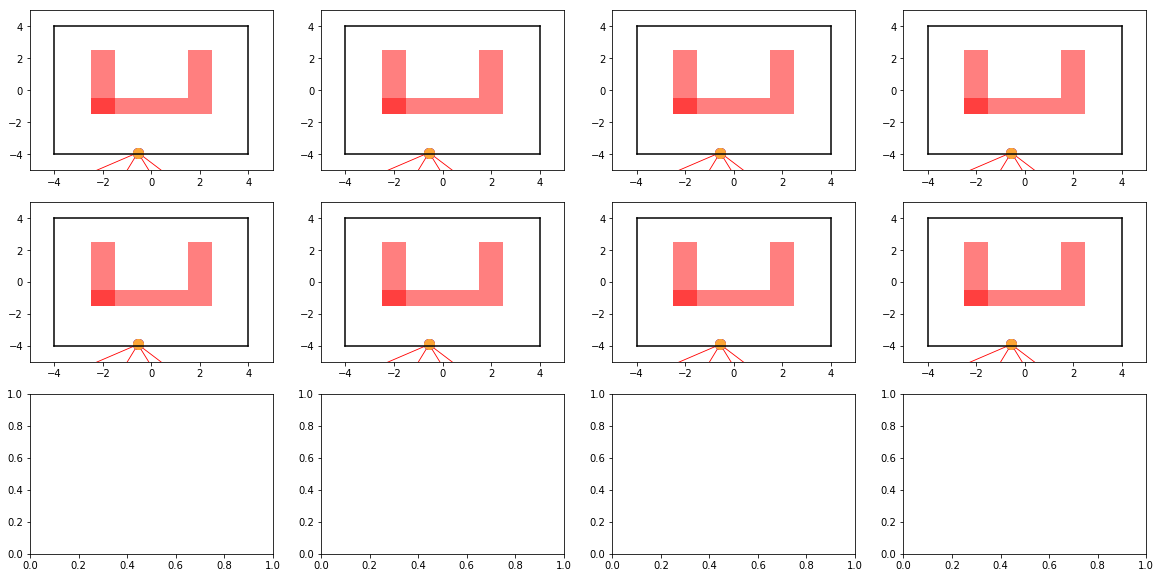

In [99]:
plot_traj("/home/vitchyr/git/handful-of-trials/log/point-uwall-sweep-after-terminal-cost-fix-2/2019-07-10--15:49:40/debug_log/2019-07-11--13:28:59/train_iter1/predictions.mat")
plot_goals("/home/vitchyr/git/handful-of-trials/log/point-uwall-sweep-after-terminal-cost-fix-2/2019-07-10--15:49:40/debug_log/2019-07-11--13:28:59/train_iter1/predictions.mat")

In [114]:
goals = get_goals("/home/vitchyr/git/handful-of-trials/log/point-uwall-sweep-after-terminal-cost-fix-2/2019-07-10--15:49:40/debug_log/2019-07-11--13:28:59/train_iter1/predictions.mat")
states = get_states("/home/vitchyr/git/handful-of-trials/log/point-uwall-sweep-after-terminal-cost-fix-2/2019-07-10--15:49:40/debug_log/2019-07-11--13:28:59/train_iter1/predictions.mat")

shape dims: (planning time, within-plan time, particle, goal dim)
shape dims: (planning time, within-plan time, particle, state dim)


In [119]:
print(goals.shape)
print(states.shape)
# planning time,within-episode time,particle,dimension
print(np.std(goals[:, :, :, 0]))
print(np.std(goals[:, :, :, 1]))
goal = np.mean(goals, axis=(0, 1, 2))
avg_states = np.mean(states, axis=2)
print(avg_states.shape)
print(goal)

(3, 8, 20, 2)
(3, 8, 20, 2)
0.006332458
0.0056441477
(3, 8, 2)
[1.0999321 2.6559625]


[3.7826023 2.6996477 2.477174  2.3659065 2.093705  1.8022867 1.3955575
 1.0724659]
[2.662189  2.6404455 2.640899  3.5381253 3.141539  2.4039848 1.9521893
 1.4503331]
[2.657842  2.6128783 2.575915  2.6061292 2.6783788 2.6825457 2.939288
 3.0332947]


Text(0, 0.5, 'predicted distance')

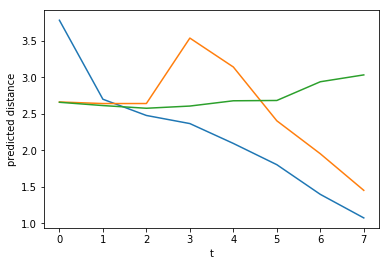

In [127]:
plt.figure()
for plan_t in range(3):
    state_traj = avg_states[plan_t]
    dist = np.linalg.norm(state_traj - goal, axis=1)
    print(dist)
    plt.plot(np.arange(len(state_traj)), dist)
plt.xlabel("t")
plt.ylabel("predicted distance")